<a href="https://colab.research.google.com/github/ElenaShargina/nnetworks/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Решение задачи регрессии с помощью нейронных сетей

Определение стоимости недвижимости из набора данных [California Housing Data Set](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Загружаем данные

Просматриваем содержимое каталога с демонстрационными данными Colab

In [58]:
!ls sample_data

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


Загружаем данные для обучения

In [59]:
train = pd.read_csv('sample_data/california_housing_train.csv')

Загружаем данные для тестирования

In [60]:
test = pd.read_csv('sample_data/california_housing_test.csv')

## Исследуем данные

Просматриваем данные для обучения

In [61]:
train[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**Описание данных**

California Housing содержит данные о средней стоимость домов в Калифорнии для квартала. Файл с данными содержит следующие столбцы:

*   **longitude** - долгота квартала с недвижимостью.
*   **latitude** - широта квартала с недвижимостью.
*   **housing_median_age** - медиана возраста домов в квартале.
*   **total_rooms** - общее колиичество комнат в квартале.
*   **total_bedrooms** - общее количество спален в квартале.
*   **population** - население квартала.
*   **households** - количество "домохозяйств" в квартале (групп людей живущих вместе в одном доме. Как правило это семьи).
*   **median_income** - медианный доход в квартале.
*   **median_house_value** - медианная стоимость дома в квартале.



Просматриваем данные для тестирования

In [62]:
test[:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


## Постановка задачи регрессии

Необходимо определить медианную стоимость дома в квартале, зная все остальные признаки.

**Целевая переменная**: `median_house_value`

**Признаки**: `longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households,	median_income`

Признаки подаются на вход нейронной сети, на выходе сеть должна выдать значение целевой переменной - `median_house_value`

In [63]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
target = 'median_house_value'

## Подготовка данных для обучения

Делим набор данных на признаки и правильные ответы

In [64]:
# Выделяем данные для обучения и преобразуем их в массивы numpy
x_train = train[features].values
x_test = test[features].values

In [65]:
x_train[:5]

array([[-1.1431e+02,  3.4190e+01,  1.5000e+01,  5.6120e+03,  1.2830e+03,
         1.0150e+03,  4.7200e+02,  1.4936e+00],
       [-1.1447e+02,  3.4400e+01,  1.9000e+01,  7.6500e+03,  1.9010e+03,
         1.1290e+03,  4.6300e+02,  1.8200e+00],
       [-1.1456e+02,  3.3690e+01,  1.7000e+01,  7.2000e+02,  1.7400e+02,
         3.3300e+02,  1.1700e+02,  1.6509e+00],
       [-1.1457e+02,  3.3640e+01,  1.4000e+01,  1.5010e+03,  3.3700e+02,
         5.1500e+02,  2.2600e+02,  3.1917e+00],
       [-1.1457e+02,  3.3570e+01,  2.0000e+01,  1.4540e+03,  3.2600e+02,
         6.2400e+02,  2.6200e+02,  1.9250e+00]])

In [66]:
# Выделяем правильные ответы и преобразуем их в массивы numpy
y_train = train[target].values
y_test = test[target].values

In [67]:
y_train[0:5]

array([66900., 80100., 85700., 73400., 65500.])

**Стандартизация данных**

Вычитаем среднее значение и делим на стандартное отклонение

In [68]:
# Среднее значение
mean = x_train.mean(axis=0)
# Стандартное отклонение
std = x_train.std(axis=0)
x_train = (x_train-mean)/std
x_test = (x_test-mean)/std

Проверяем размерности получившихся массивов

In [69]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17000, 8), (3000, 8), (17000,), (3000,))

## Создаем нейронную сеть

Выходной слой с одним линейным нейроном - для задачи регрессии функция активации - RELU.

ReLu = max(0,x)

In [70]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='relu'))

In [71]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               2304      
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 43,521
Trainable params: 43,521
Non-trainable params: 0
_________________________________________________________________
None


**Компилируем сеть**

Функция ошибки - среднеквадратичное отклонение (Mean Square Error). 

$MSE = \frac{\sum_{i=1}^{n}{(y_i-x_i)^2}}{n}$

Метрика - среднее абсолютное отклонение (Mean Absolute Error).

$MAE = \frac{\sum_{i=1}^{n}{|y_i-x_i|}}{n}$

Метрика - среднее абсолютных отклонений

$MAPE = \frac{1}{N}\frac{\sum_{i=1}^n{|y_i-x_i|}}{y_i}100$

In [72]:
model.compile(optimizer='adam', loss='mape', metrics=['mae'])

## Обучаем нейронную сеть



In [73]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=500, 
                    validation_split=0.1, 
                    verbose=2)

Epoch 1/500
479/479 - 2s - loss: 73.1246 - mae: 157655.6250 - val_loss: 60.8296 - val_mae: 157851.7500 - 2s/epoch - 4ms/step
Epoch 2/500
479/479 - 1s - loss: 38.3750 - mae: 84619.3672 - val_loss: 49.1588 - val_mae: 108909.2344 - 676ms/epoch - 1ms/step
Epoch 3/500
479/479 - 1s - loss: 26.7013 - mae: 55773.2266 - val_loss: 37.9464 - val_mae: 82621.1406 - 668ms/epoch - 1ms/step
Epoch 4/500
479/479 - 1s - loss: 24.0538 - mae: 50588.7969 - val_loss: 33.2907 - val_mae: 75568.2812 - 666ms/epoch - 1ms/step
Epoch 5/500
479/479 - 1s - loss: 23.1602 - mae: 48583.8594 - val_loss: 32.0815 - val_mae: 71042.3438 - 653ms/epoch - 1ms/step
Epoch 6/500
479/479 - 1s - loss: 22.8013 - mae: 47723.8086 - val_loss: 31.2755 - val_mae: 71286.6016 - 665ms/epoch - 1ms/step
Epoch 7/500
479/479 - 1s - loss: 22.5611 - mae: 47169.7266 - val_loss: 30.7322 - val_mae: 69045.9062 - 657ms/epoch - 1ms/step
Epoch 8/500
479/479 - 1s - loss: 22.4310 - mae: 46877.1797 - val_loss: 30.8246 - val_mae: 68042.1562 - 660ms/epoch - 1

## Визуализация качества обучения

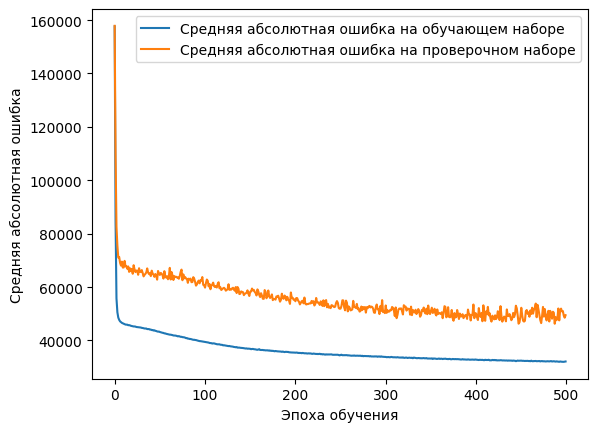

In [74]:
plt.plot(history.history['mae'], 
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_mae'], 
         label='Средняя абсолютная ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Средняя абсолютная ошибка')
plt.legend()
plt.show()

## Проверяем работу модели на тестовом наборе данных

In [75]:
scores = model.evaluate(x_test, y_test, verbose=1)

94/94 [==============================] - 0s 1ms/step - loss: 17.4154 - mae: 35923.0273


In [76]:
print("Средняя абсолютная ошибка на тестовых данных:", round(scores[1], 4))

Средняя абсолютная ошибка на тестовых данных: 35923.0273


## Используем модель для предсказаний

**Выполняем предсказание для тестовой выборки**

In [77]:
pred = model.predict(x_test).flatten()

94/94 [==============================] - 0s 897us/step


In [78]:
print(pred)

[412764.97 207725.38 284914.03 ...  74461.26  62465.62 466076.22]


**Печатаем примеры результатов**

In [79]:
test_index=5
print("Предсказанная стоимость:", pred[test_index], ", правильная стоимость:", y_test[test_index])

Предсказанная стоимость: 52187.68 , правильная стоимость: 67000.0


## Визуализируем результаты предсказаний

График предсказаний

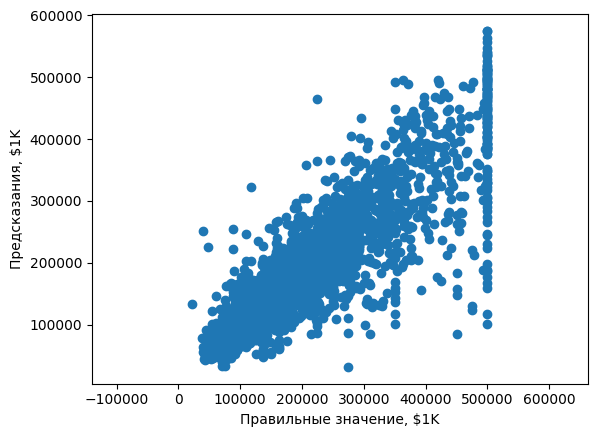

In [80]:
plt.scatter(y_test, pred)
plt.xlabel('Правильные значение, $1K')
plt.ylabel('Предсказания, $1K')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.plot([-100, 100], [-100, 100])
plt.show()

Гистограмма ошибок

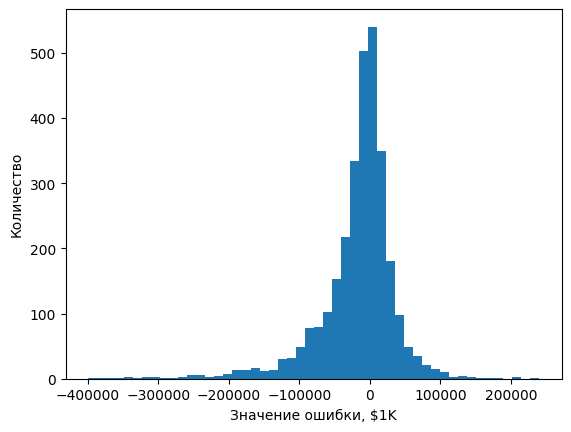

In [81]:
error = pred - y_test
plt.hist(error, bins = 50)
plt.xlabel("Значение ошибки, $1K")
plt.ylabel("Количество")
plt.show()